In [2]:
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

In [3]:
snr_ranges = list(range(0,31,5))

# snr = -10log(sigma**2)
# sigma_sq = 10**(-snr/10)

sigma_list = []

for snr in snr_ranges:
    sigma_sq = 10**(-snr/10)
    sigma = sigma_sq**0.5
    sigma_list.append(sigma)

sigma_list

[1.0,
 0.5623413251903491,
 0.31622776601683794,
 0.17782794100389226,
 0.1,
 0.05623413251903491,
 0.03162277660168379]

In [59]:
def get_nmse(N, M, sigma):
    
    # Generate fixed H (measurement matrix)
    H = np.random.normal(0, 1, size=(N, M))

    # Generate a single sparse x
    x_true = np.zeros(M)
    non_zero_indices = np.random.choice(M, size=M//10, replace=False)
    x_true[non_zero_indices] = np.random.normal(0, 1, size=M//10)

    # Generate observed Y with Gaussian noise
    noise = np.random.normal(0, sigma, N)
    Y = H @ x_true + noise  # Single observed data point

    alpha = [1]*M

    stan_data = {
        "N": N,
        "M": M,
        "Y": Y,
        "H": H,
        "sigma": sigma,
        "alpha": alpha
    }


    NMSE_list = []
    NMSE_last = 1
    iters = 0

    while iters < 50:
        model = CmdStanModel(stan_file="sbl.stan")
        fit = model.sample(data=stan_data, chains=4, iter_warmup=150, iter_sampling=150, max_treedepth=15)

        posterior_samples = fit.draws_pd()
        mean_x = np.array((posterior_samples.filter(like='x').mean()))
        std_x = np.array((posterior_samples.filter(like='x').std()))

        norm_diff_squared = np.sum((x_true - mean_x)**2)
        norm_x_squared = np.sum(x_true**2)
        NMSE = norm_diff_squared / norm_x_squared

        NMSE_list.append(NMSE)

        print('##### NMSE #####', NMSE)

        w_x = mean_x*mean_x + std_x
        stan_data["alpha"] = w_x


        iters += 1

        # if iters > 5 and NMSE_list[-1] > sum(NMSE_list[:-5])/5:
        #     NMSE_last = NMSE
        #     break

        NMSE_last = NMSE

    return NMSE_list
    


In [69]:
NMSE_dict = {}

for i in range(len(sigma_list)):
    nmse_total = 0
    K = 1
    for iter in range(K):
        nmse = get_nmse(N=20, M=50, sigma=sigma_list[i])[-1]
        nmse_total += nmse
    NMSE_dict[snr_ranges[i]] = nmse_total/K


17:50:12 - cmdstanpy - INFO - CmdStan start processing













































































































chain 1 |██████████| 00:00 Sampling completed                     








chain 2 |██████████| 00:00 Sampling completed









chain 3 |██████████| 00:00 Sampling completed










chain 4 |██████████| 00:00 Sampling completed


17:50:13 - cmdstanpy - INFO - CmdStan done processing.
17:50:13 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.6257177280267938








































































































chain 1 |██████████| 00:00 Sampling completed                     








chain 2 |██████████| 00:00 Sampling completed









chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                     


17:50:13 - cmdstanpy - INFO - CmdStan done processing.
17:50:13 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.4316268769731187








































































































chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


17:50:14 - cmdstanpy - INFO - CmdStan done processing.
17:50:14 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.2576979424210362








































































































chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


17:50:14 - cmdstanpy - INFO - CmdStan done processing.
17:50:15 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.15191806569792957





















































































chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


17:50:15 - cmdstanpy - INFO - CmdStan done processing.
17:50:15 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.10383963684954164






































































chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


17:50:15 - cmdstanpy - INFO - CmdStan done processing.
17:50:15 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.06373681330060925






































































chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


17:50:16 - cmdstanpy - INFO - CmdStan done processing.
17:50:16 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.047824510012808






































































chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


17:50:16 - cmdstanpy - INFO - CmdStan done processing.
17:50:16 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.04131948614629323




































chain 1 |██████████| 53:35 Iteration: 400 / 400 [100%]  (Sampling)
chain 2 |██████████| 53:35 Iteration: 400 / 400 [100%]  (Sampling)


































chain 3 |██████████| 53:35 Iteration: 400 / 400 [100%]  (Sampling)
chain 4 |██████████| 53:35 Iteration: 400 / 400 [100%]  (Sampling)
chain 1 |          | 01:09 Status
chain 2 |          | 01:09 Status
chain 3 |████      | 01:09 Iteration: 100 / 300 [ 33%]  (Warmup)
chain 4 |          | 01:09 Status


































chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


17:50:16 - cmdstanpy - INFO - CmdStan done processing.
17:50:16 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.03939438529265105


chain 1 |          | 00:00 Status


chain 1 |████████  | 00:00 Iteration: 151 / 300 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


17:50:17 - cmdstanpy - INFO - CmdStan done processing.
17:50:17 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.03162334434849605


chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


17:50:17 - cmdstanpy - INFO - CmdStan done processing.
17:50:17 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.028188083681565678


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                     

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


17:50:17 - cmdstanpy - INFO - CmdStan done processing.
17:50:17 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.024877101797428188


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:17 - cmdstanpy - INFO - CmdStan done processing.
17:50:17 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.01856520504554402


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:18 - cmdstanpy - INFO - CmdStan done processing.
17:50:18 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.014268612192962776


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:18 - cmdstanpy - INFO - CmdStan done processing.
17:50:18 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.011463131172203588


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

17:50:18 - cmdstanpy - INFO - CmdStan done processing.


17:50:18 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.00927271964902837


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

17:50:18 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.008708063203235446


17:50:18 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:18 - cmdstanpy - INFO - CmdStan done processing.


17:50:18 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.00813315441103584


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:19 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.007122864305947573


17:50:19 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:19 - cmdstanpy - INFO - CmdStan done processing.


17:50:19 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.006771934007781724


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:19 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.006334477014700788


17:50:19 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:19 - cmdstanpy - INFO - CmdStan done processing.


17:50:19 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.005969699157260261


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:19 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.006023070534704349


17:50:19 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:19 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.005388096674820948


17:50:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:20 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.005598212716233662


17:50:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:20 - cmdstanpy - INFO - CmdStan done processing.
17:50:20 - cmdstanpy - INFO - CmdStan start processing



##### NMSE ##### 0.005504570132276743


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:20 - cmdstanpy - INFO - CmdStan done processing.


17:50:20 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.0054469613925104444


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:20 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.005319357136199506


17:50:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:21 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.005068018065172798


17:50:21 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:21 - cmdstanpy - INFO - CmdStan done processing.


17:50:21 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.005014368029689539


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:21 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.004754052768408127


17:50:21 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:21 - cmdstanpy - INFO - CmdStan done processing.


17:50:21 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.004962825397332086


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:21 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.0047902398468695215


17:50:21 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:21 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.004657935026238005


17:50:22 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:22 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.004691416181540366


17:50:22 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:22 - cmdstanpy - INFO - CmdStan done processing.


17:50:22 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.004452101102622965


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:22 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.00453279174633669


17:50:22 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:22 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.004640774738667586


17:50:22 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:22 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.0046867935131051554


17:50:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:23 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.00425892978413196


17:50:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:23 - cmdstanpy - INFO - CmdStan done processing.


17:50:23 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.004652220303840018


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:23 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.004678738479217915


17:50:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:23 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.004203777600750867


17:50:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:23 - cmdstanpy - INFO - CmdStan done processing.


17:50:24 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.004588979588945962


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:24 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.004409030964046469


17:50:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:24 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.004352384132293956


17:50:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:24 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.004200783564456543


17:50:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:24 - cmdstanpy - INFO - CmdStan done processing.


17:50:24 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.004132812396726007


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:24 - cmdstanpy - INFO - CmdStan done processing.


17:50:25 - cmdstanpy - INFO - CmdStan start processing


##### NMSE ##### 0.004341983135239539


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


17:50:25 - cmdstanpy - INFO - CmdStan done processing.



##### NMSE ##### 0.004438327505046619


In [76]:
NMSE_dict

{0: 0.3277613593050331,
 5: 0.09983804555246331,
 10: 0.043396201470402546,
 15: 0.006438327505046619,
 20: 0.0038993926157031796,
 25: 0.0033745477297323504,
 30: 0.00031226909868829636}

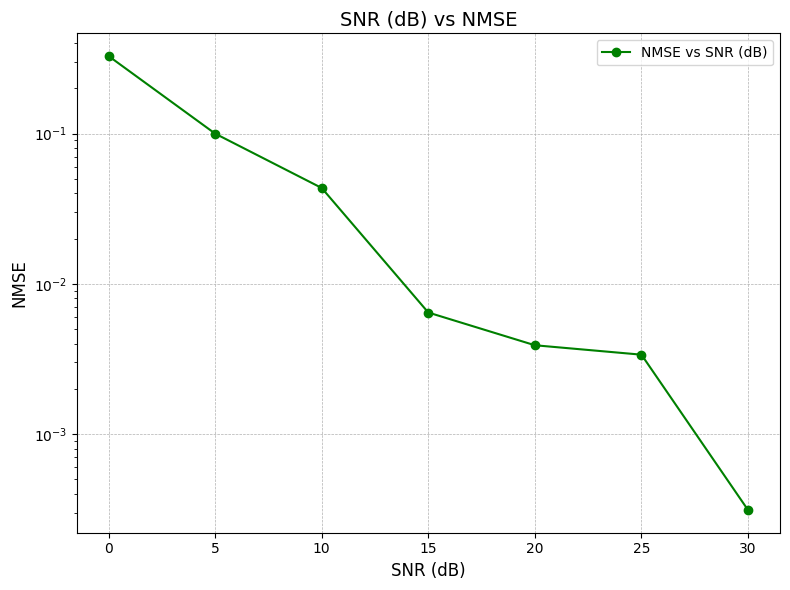

In [75]:
snr = list(NMSE_dict.keys())
nmse = list(NMSE_dict.values())
# nmse = [i[-1] for i in nmse]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(snr, nmse, marker='o', linestyle='-', color='g', label='NMSE vs SNR (dB)')
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('NMSE', fontsize=12)
plt.title('SNR (dB) vs NMSE', fontsize=14)

# Set y-axis to logarithmic scale
plt.yscale('log')

plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()